In [16]:
# visualize the 2D gaussian distribution given mu vector and sigma matrix

import numpy as np
import matplotlib.pyplot as plt
size = 5

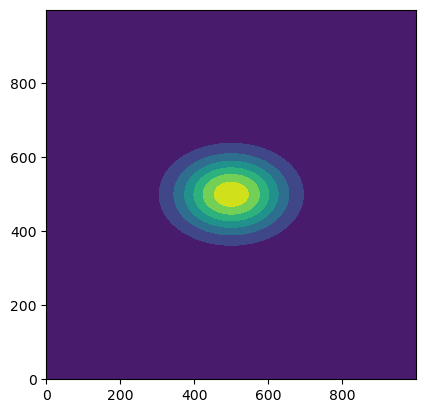

In [17]:
def gaussian2d(mu, sigma):
    # mu: 2 vector
    # sigma: 2 vector
    # return: 2D gaussian distribution
    x, y = np.mgrid[-1 * size:size:.01, -1 * size:size:.01]
    pos = np.dstack((x, y))
    sigma = np.diag(sigma)
    inv_sigma = np.linalg.inv(sigma)
    Z = np.exp(-0.5 * np.einsum('...k,kl,...l->...', pos - mu, inv_sigma, pos - mu))
    return Z

def plot_gaussian2d(mu, sigma):
    # mu: 2 vector
    # sigma: 2 vector
    # return: None
    Z = gaussian2d(mu, sigma)
    plt.contourf(Z)
    # make sure axes are scaled equally
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

mu = np.array([0, 0])
sigma = np.array([0.5, 1])
plot_gaussian2d(mu, sigma)

def combined_gaussian2d(ns, mus, sigmas):
    # mu: 2 vector
    # sigma: 2 vector
    # return: combined gaussian distribution
    mu_hat = np.sum(ns[:, np.newaxis] * mus, axis=0) / np.sum(ns)
    sigma_hat = np.sum(ns[:, np.newaxis] * (sigmas ** 2 + mu ** 2), axis=0) / np.sum(ns)
    return mu_hat, sigma_hat

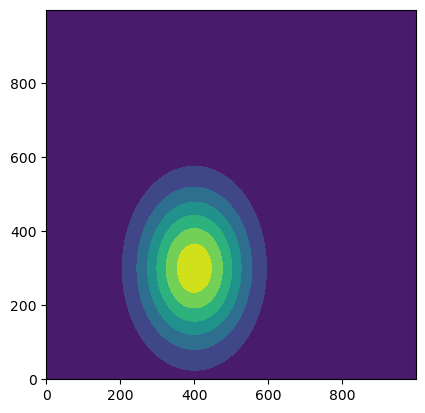

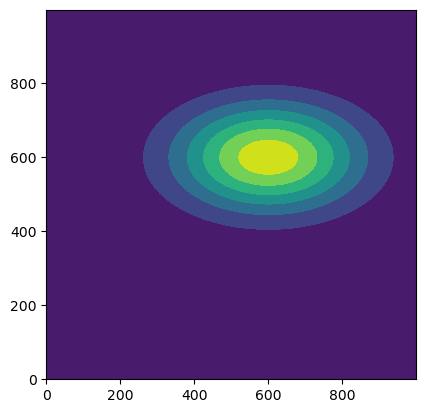

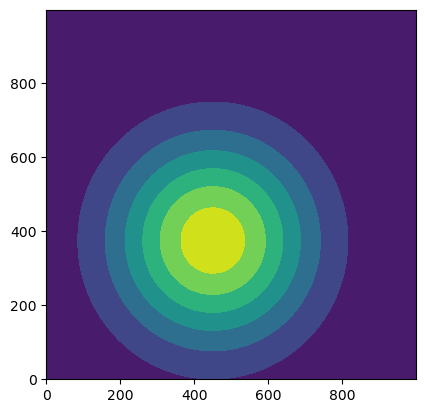

In [37]:
ns = np.array([30, 10])

mus = np.array(
    [[-2, -1],
     [1, 1]]
)

sigmas = np.array(
    [[2, 1],
     [1, 3]]
)

def plot_combination(ns, mus, sigmas):
    # ns: n vector
    # mus: nx2 vector
    # sigmas: nx2 matrix
    # return: None
    # plot each of the gaussians individually
    # get the combined gaussian and then plot that too
    for i in range(ns.shape[0]):
        plot_gaussian2d(mus[i], sigmas[i])
    mu_hat, sigma_hat = combined_gaussian2d(ns, mus, sigmas)
    plot_gaussian2d(mu_hat, sigma_hat)

plot_combination(ns, mus, sigmas)

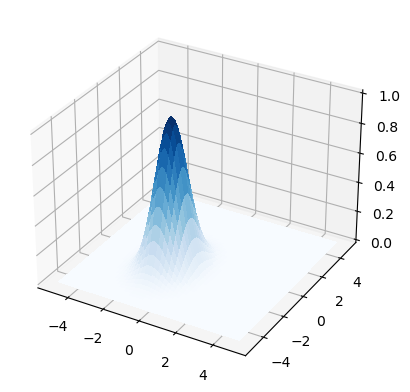

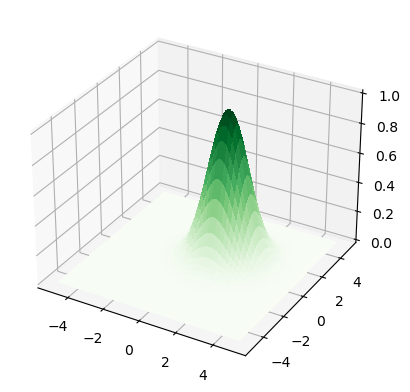

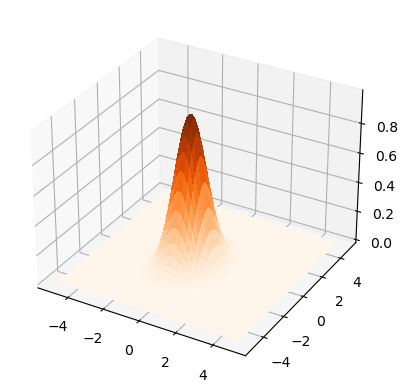

In [30]:
# same as the previous cell but plot the gaussian in 3D, with the height of the surface being the probability

from matplotlib import cm

def plot_gaussian3d(mu, sigma, color):
    # mu: 2 vector
    # sigma: 2 vector
    # return: None
    Z = gaussian2d(mu, sigma)
    ax = plt.axes(projection="3d")
    X, Y = np.mgrid[-1 * size:size:.01, -1 * size:size:.01]
    ax.plot_surface(X, Y, Z, cmap=color, linewidth=0, antialiased=False)
    plt.show()

def plot_combination_3D(ns, mus, sigmas):
    # ns: n vector
    # mus: nx2 vector
    # sigmas: nx2 matrix
    # return: None
    # plot each of the gaussians individually
    # get the combined gaussian and then plot that too
    colors = ["Blues", "Greens", "Oranges"]
    for i in range(ns.shape[0]):
        plot_gaussian3d(mus[i], sigmas[i], colors[i])
    mu_hat, sigma_hat = combined_gaussian2d(ns, mus, sigmas)
    plot_gaussian3d(mu_hat, sigma_hat, colors[-1])
    # plt.show()

plot_combination_3D(ns, mus, sigmas)

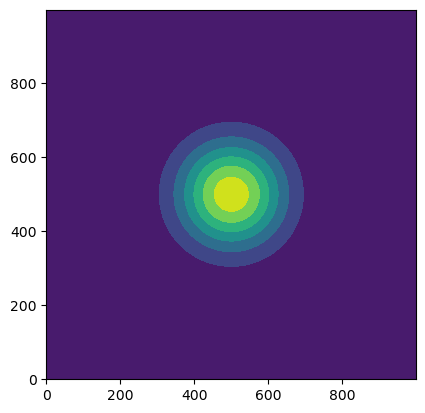

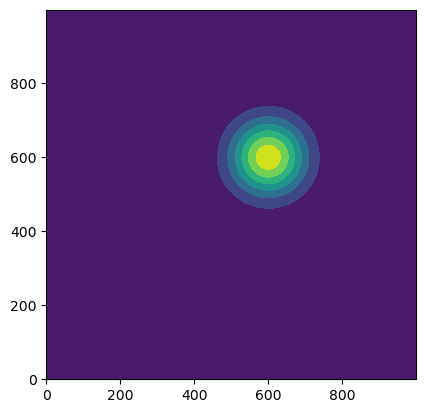

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [40]:
def bayesian_update(mu_prior, sigma_prior, mu_obv, sigma_obv):
    # mu_prior: 2 vector
    # sigma_prior: 2 vector
    # mu_obv: 2 vector
    # sigma_obv: 2 vector
    # return: mu_posterior, sigma_posterior
    sigma_prior = np.diag(sigma_prior)
    sigma_obv = np.diag(sigma_obv)
    sigma_posterior = np.linalg.inv(np.linalg.inv(sigma_prior) + np.linalg.inv(sigma_obv))
    mu_posterior = sigma_posterior @ (np.linalg.inv(sigma_prior) @ mu_prior + np.linalg.inv(sigma_obv) @ mu_obv)
    sigma_posterior = np.diag(sigma_posterior)
    return mu_posterior, sigma_posterior

mu_prior = np.array([0, 0])
sigma_prior = np.array([1, 1])
plot_gaussian2d(mu_prior, sigma_prior)
mu_obv = np.array([1, 1])
sigma_obv = np.array([0.5, 0.5])
plot_gaussian2d(mu_obv, sigma_obv)
mu_posterior, sigma_posterior = bayesian_update(mu_prior, sigma_prior, mu_obv, sigma_obv)
plot_gaussian2d(mu_posterior, sigma_posterior)